<a href="https://colab.research.google.com/github/slitvinov/odil-examples/blob/main/sparce.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [10]:
import scipy
import matplotlib.pyplot as plt
import math
import numpy as np

In [31]:
def cappend(i, j, d):
    row.append(len(rhs))
    col.append(i * nx + j)
    data.append(d)

def residues(x):
    return A @ x - rhs

def fun(x):
    r = residues(x)
    return (r @ r) / 2

def jac(x):
    r = residues(x)
    return A.T @ r

def hessp(x, v):
    return A.T @ (A @ v)

res.nfev=12 res.njev=12 res.nhev=1258


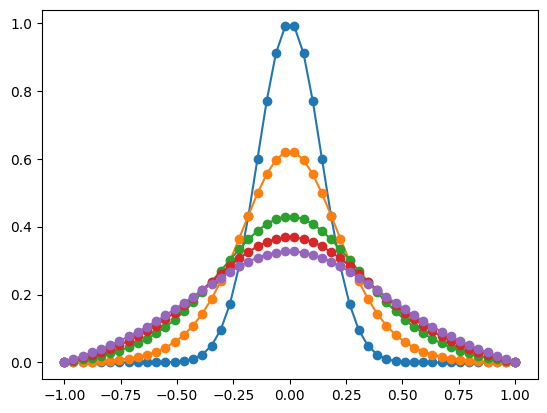

In [30]:
row = []
col = []
rhs = []
data = []
nx = 50
nt = 10
L = 1.0
T = 10.0
alpha = 0.01
sigma = 0.2
dx = 2 * L / (nx - 1)
dt = T / nt
c0 = -alpha / (dx**2)
c1 = 1.0 / dt + 2.0 * alpha / (dx**2)
c2 = -1.0 / dt
x = np.linspace(-L, L, nx)
for j in range(nx):
    cappend(0, j, 1)
    rhs.append(math.exp(-(x[j] / sigma)**2))
for i in range(1, nt):
    for j in range(nx):
        if j == 0 or j == nx - 1:
            cappend(i, j, 1)
            rhs.append(0.0)
        else:
            cappend(i, j - 1, c0)
            cappend(i, j, c1)
            cappend(i, j + 1, c0)
            cappend(i - 1, j, c2)
            rhs.append(0.0)
A = scipy.sparse.csr_matrix((data, (row, col)), dtype=float)
x0 = np.zeros(nx * nt)
res = scipy.optimize.minimize(fun,
                              x0=x0,
                              jac=jac,
                              hessp=hessp,
                              method='Newton-CG')
print(f"{res.nfev=} {res.njev=} {res.nhev=}")
u = res.x.reshape(nt, nx)
for k in 0, nt // 4, nt // 2, 3 * nt // 4, nt - 1:
    plt.plot(x, u[k, :], 'o-')